In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# Read in games.csv
games_df = pd.read_csv('data/games.csv')

# Remove not needed columns
games = games_df.loc[:, ~games_df.columns.str.contains('url', case=False)]

# Games that support English
games = games[games['Supported languages'].str.contains('english', case=False)]

# Remove columns
columns_to_remove = ['Supported languages','Required age','Positive','Negative','Score rank','Achievements','Website','Support email','Reviews','Header image','Full audio languages', 'Tags', 'Screenshots', 'Movies', 'About the game', 'Peak CCU', 'Notes']
games = games.drop(columns=columns_to_remove, errors='ignore')

# Make Estimated Owners average
# Extract minimum and maximum values using regular expressions
owners_range = games['Estimated owners'].str.extract(r'(\d+) - (\d+)')
min_owners = owners_range[0].astype(float)
max_owners = owners_range[1].astype(float)

# Calculate the average and replace the 'Estimated owners' column
games['Estimated owners'] = (min_owners + max_owners) / 2

games.to_csv('data/games_cleaned.csv', index=False)

In [59]:
games.head()

,AppID,Name,Release date,Estimated owners,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres
0,20200,Galactic Bowling,"Oct 21, 2008",10000.0,19.99,0,True,False,False,0,0,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,655370,Train Bandit,"Oct 12, 2017",10000.0,0.99,0,True,True,False,0,0,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie"
2,1732930,Jolt Project,"Nov 17, 2021",10000.0,4.99,0,True,False,False,0,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy"
3,1355720,Henosis™,"Jul 23, 2020",10000.0,5.99,0,True,True,True,0,0,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie"
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000.0,0.00,0,True,True,False,0,0,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie"


In [50]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 72562 entries, 0 to 78580
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       72562 non-null  int64  
 1   Name                        72558 non-null  object 
 2   Release date                72562 non-null  object 
 3   Estimated owners            72562 non-null  object 
 4   Price                       72562 non-null  float64
 5   DLC count                   72562 non-null  int64  
 6   Supported languages         72562 non-null  object 
 7   Windows                     72562 non-null  bool   
 8   Mac                         72562 non-null  bool   
 9   Linux                       72562 non-null  bool   
 10  Metacritic score            72562 non-null  int64  
 11  User score                  72562 non-null  int64  
 12  Recommendations             72562 non-null  int64  
 13  Average playtime forever    72562 no

In [60]:
# Assuming your DataFrame is named df
missing_values = games.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


AppID                            0
Name                             4
Release date                     0
Estimated owners                 0
Price                            0
DLC count                        0
Windows                          0
Mac                              0
Linux                            0
Metacritic score                 0
User score                       0
Recommendations                  0
Average playtime forever         0
Average playtime two weeks       0
Median playtime forever          0
Median playtime two weeks        0
Developers                     115
Publishers                     386
Categories                    1082
Genres                          85
dtype: int64


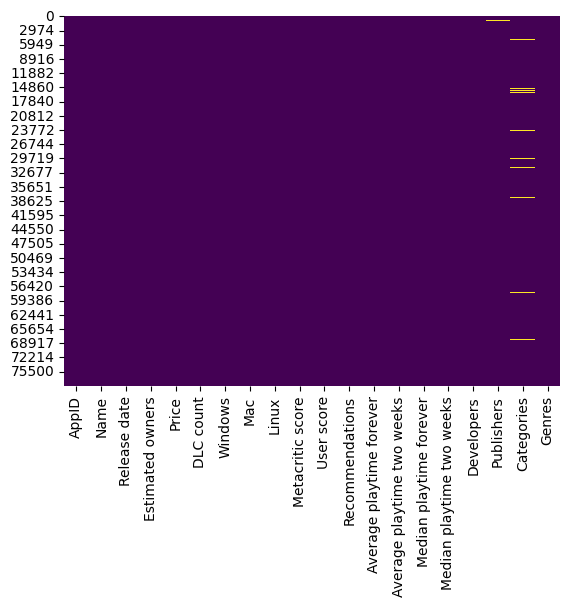

In [61]:
# Create a heatmap of missing values
sns.heatmap(games.isnull(), cbar=False, cmap='viridis')

# Display the plot
plt.show()


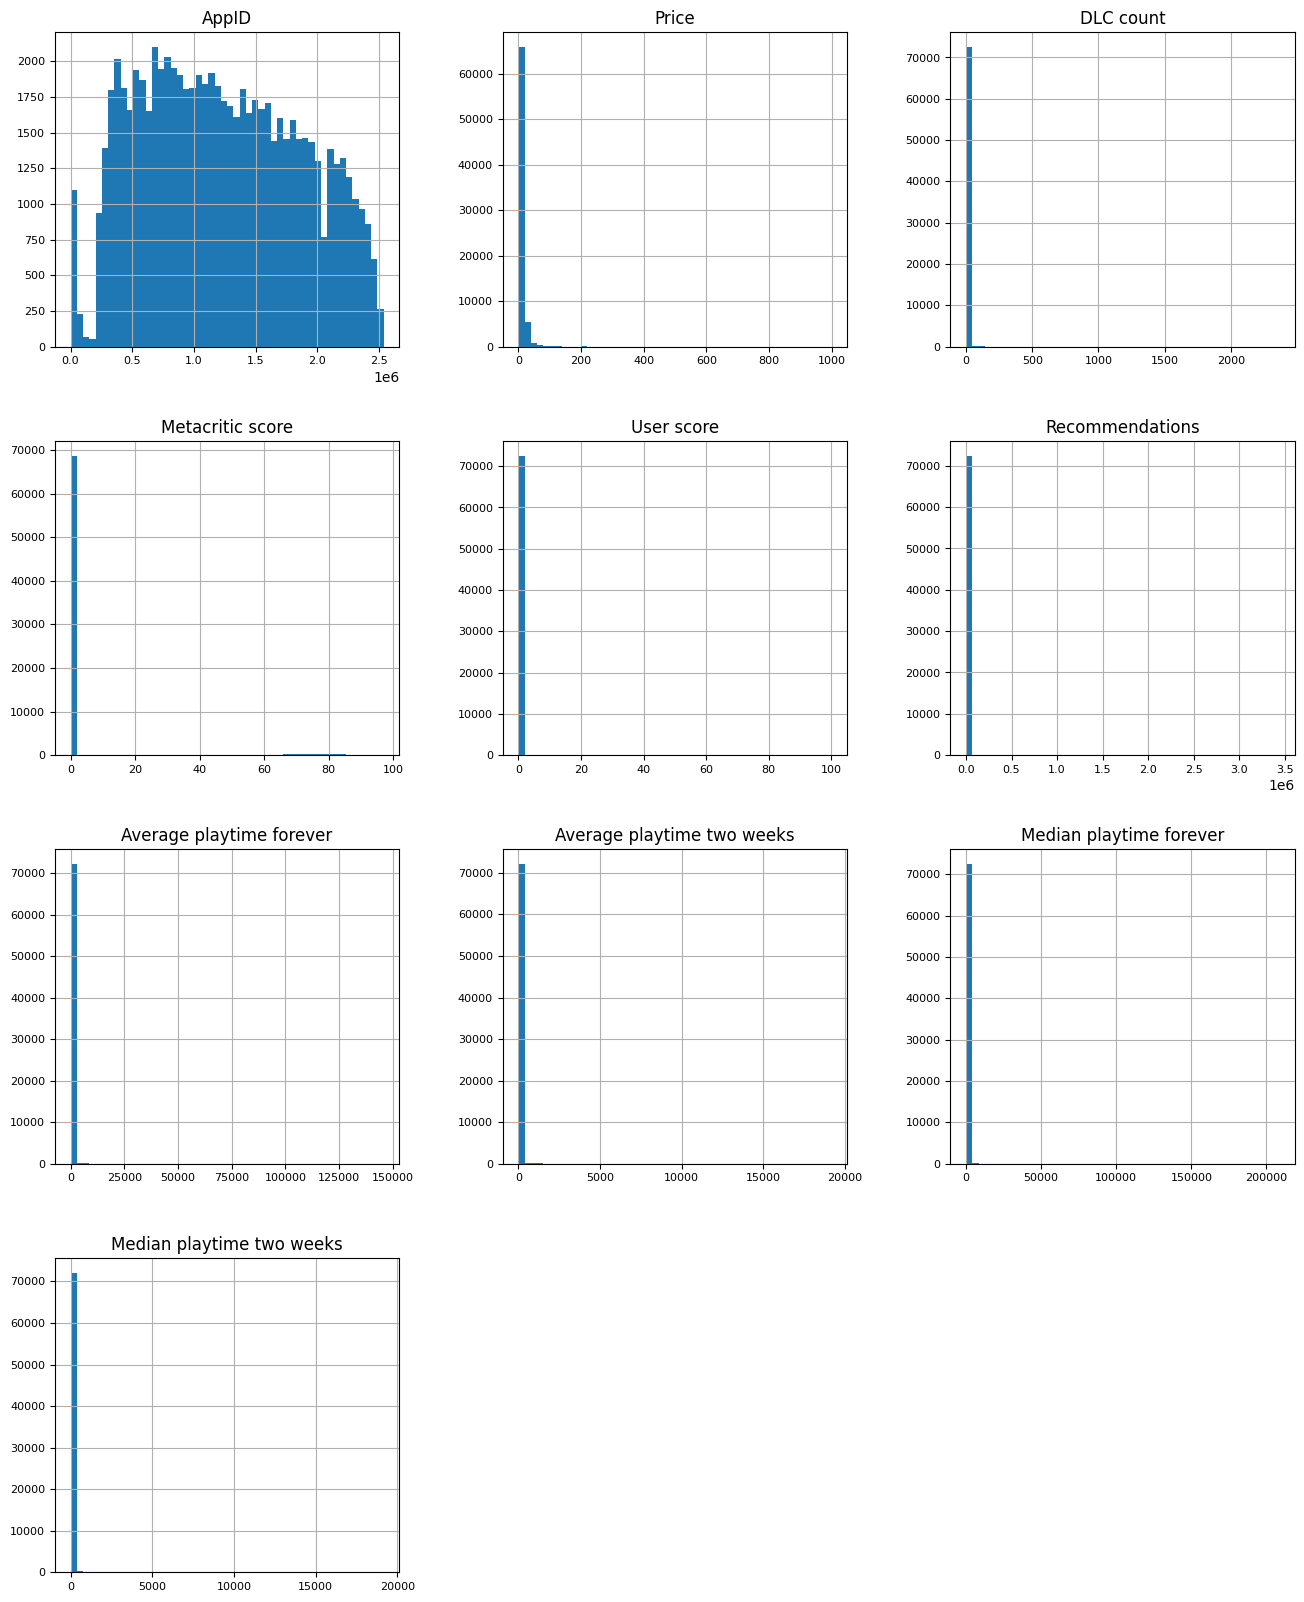

In [48]:
# Distribution of numerical features
numerical_features = games.select_dtypes(include=[np.number])
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [62]:
games['Developers'].value_counts()

Developers
Choice of Games               150
Creobit                       136
Laush Dmitriy Sergeevich      134
Boogygames Studios            107
Sokpop Collective             101
                             ... 
Liminal Games                   1
Table 9 Studio, LLC             1
Bruno MARTIOL                   1
Agens,Room8                     1
WITCHCRAFT VIDEO GAME Ltd.      1
Name: count, Length: 44180, dtype: int64